In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("INFY.NS.csv")

In [3]:
current_value = dataset['Open']

In [4]:
current_value.values

array([ 710.200012,  735.400024,  732.799988,  737.25    ,  737.349976,
        755.      ,  765.200012,  769.400024,  784.900024,  780.      ,
        773.5     ,  788.      ,  792.950012,  799.      ,  900.099976,
        911.      ,  908.5     ,  945.      ,  938.950012,  915.650024,
        903.25    ,  921.549988,  946.      ,  953.25    ,  962.      ,
        969.25    ,  960.      ,  960.450012,  952.      ,  953.5     ,
        969.450012,  948.900024,  949.900024,  948.      ,  954.799988,
        955.849976,  954.099976,  963.900024,  970.900024,  958.900024,
        963.049988,  947.      ,  947.5     ,  941.25    ,  960.      ,
        951.450012,  935.25    ,  926.25    ,  915.      ,  926.5     ,
        915.      ,  918.900024,  929.950012,  935.      ,  935.299988,
        934.900024,  957.      ,  979.5     ,  986.      ,  995.      ,
       1011.      , 1001.      , 1009.      , 1020.150024, 1003.      ,
        975.799988, 1014.799988, 1018.      , 1009.      , 1020.

In [5]:
current_value[100]

nan

In [6]:
dataset = dataset.drop([100])

In [7]:
d = dataset.values

In [8]:
import seaborn as sns 

<AxesSubplot:>

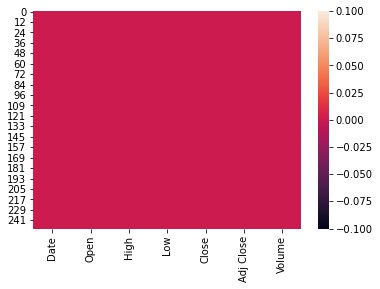

In [9]:
sns.heatmap(dataset.isnull())

In [10]:
price = dataset['Open']

In [11]:
price

0       710.200012
1       735.400024
2       732.799988
3       737.250000
4       737.349976
          ...     
246    1493.000000
247    1509.699951
248    1525.000000
249    1517.000000
250    1572.000000
Name: Open, Length: 250, dtype: float64

In [12]:
price.values[100]

1144.75

In [13]:
current = dataset['Open']
current_final = current.drop([200])

In [14]:
price.shape

(250,)

In [15]:
price = price.values

In [16]:
def datagen(data , glance) :
    x_t = []
    y_t = []
    for i in range(len(data) - glance) :
        #if data[i] is not nan :
            x_t.append(data[i:i+glance])
            y_t.append(data[i+glance])
            
    return x_t , y_t        

In [17]:
from keras.models import Sequential
mind = Sequential()
from keras.layers import LSTM
from keras.layers  import Dense
mind.add(LSTM(units=521, return_sequences = True , activation = 'tanh'))
mind.add(LSTM(units=128 ,activation='tanh'))
mind.add(Dense(units = 64, activation = 'relu' ))
mind.add(Dense(units = 32, activation = 'relu' ))
mind.add(Dense(units = 1, activation = 'linear' ))
mind.compile(optimizer='rmsprop' , loss = 'mean_squared_error')

Epoch 1/50
8/8 [==============================] - 36s 58ms/step - loss: 1471179.7500
Epoch 2/50
8/8 [==============================] - 0s 61ms/step - loss: 1369113.7361
Epoch 3/50
8/8 [==============================] - 0s 59ms/step - loss: 1338441.5556
Epoch 4/50
8/8 [==============================] - 0s 58ms/step - loss: 1324896.8889
Epoch 5/50
8/8 [==============================] - 0s 59ms/step - loss: 1302205.8472
Epoch 6/50
8/8 [==============================] - 0s 59ms/step - loss: 1199820.6944
Epoch 7/50
8/8 [==============================] - 0s 61ms/step - loss: 1215702.8889
Epoch 8/50
8/8 [==============================] - 0s 60ms/step - loss: 1114857.4028
Epoch 9/50
8/8 [==============================] - 1s 63ms/step - loss: 1091123.1944
Epoch 10/50
8/8 [==============================] - 0s 61ms/step - loss: 1001968.2361
Epoch 11/50
8/8 [==============================] - 0s 61ms/step - loss: 953329.3472
Epoch 12/50
8/8 [==============================] - 0s 60ms/step - loss: 89

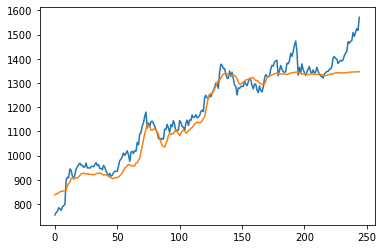

In [18]:
price_1 , price_2 = datagen(price , 5)
price_final =np.array(price_1)
price_final.shape
y_final = np.array(price_2)
X_train_final = np.expand_dims(price_final ,axis=0)
X_train_final.shape
X_train_final = X_train_final.reshape(245,5,1)
y_train_final = y_final.reshape(-1,1)
mind.fit(X_train_final,y_train_final , epochs = 50)
predict=mind.predict(X_train_final)
plt.plot(y_train_final)
plt.plot(predict)

In [ ]:
np.array(price_1).shape

In [ ]:
type(price_1 )

In [ ]:
"""from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
X_train = normalizer.fit_transform(price_1)
y_train = normalizer.fit_transform(price_2)
X_train = X_train.reshape(246,5,1) """

In [ ]:
type(X_train)

In [ ]:
price_1 = np.reshape(price_1 , (246,5,1))

In [ ]:
price_1.shape

In [ ]:
price_2

In [ ]:
dataset[100]

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
price_final =np.array(price_1)
price_final.shape
y_final = np.array(price_2)
X_train_final = np.expand_dims(price_final ,axis=0)
X_train_final.shape
X_train_final = X_train_final.reshape(245,5,1)
y_train_final = y_final.reshape(-1,1)
mind.fit(X_train_final,y_train_final , epochs = 50)
predict=mind.predict(X_train_final)
plt.plot(y_train_final)
plt.plot(predict)

In [ ]:
type(y_train)